In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows에서 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 깨짐 방지

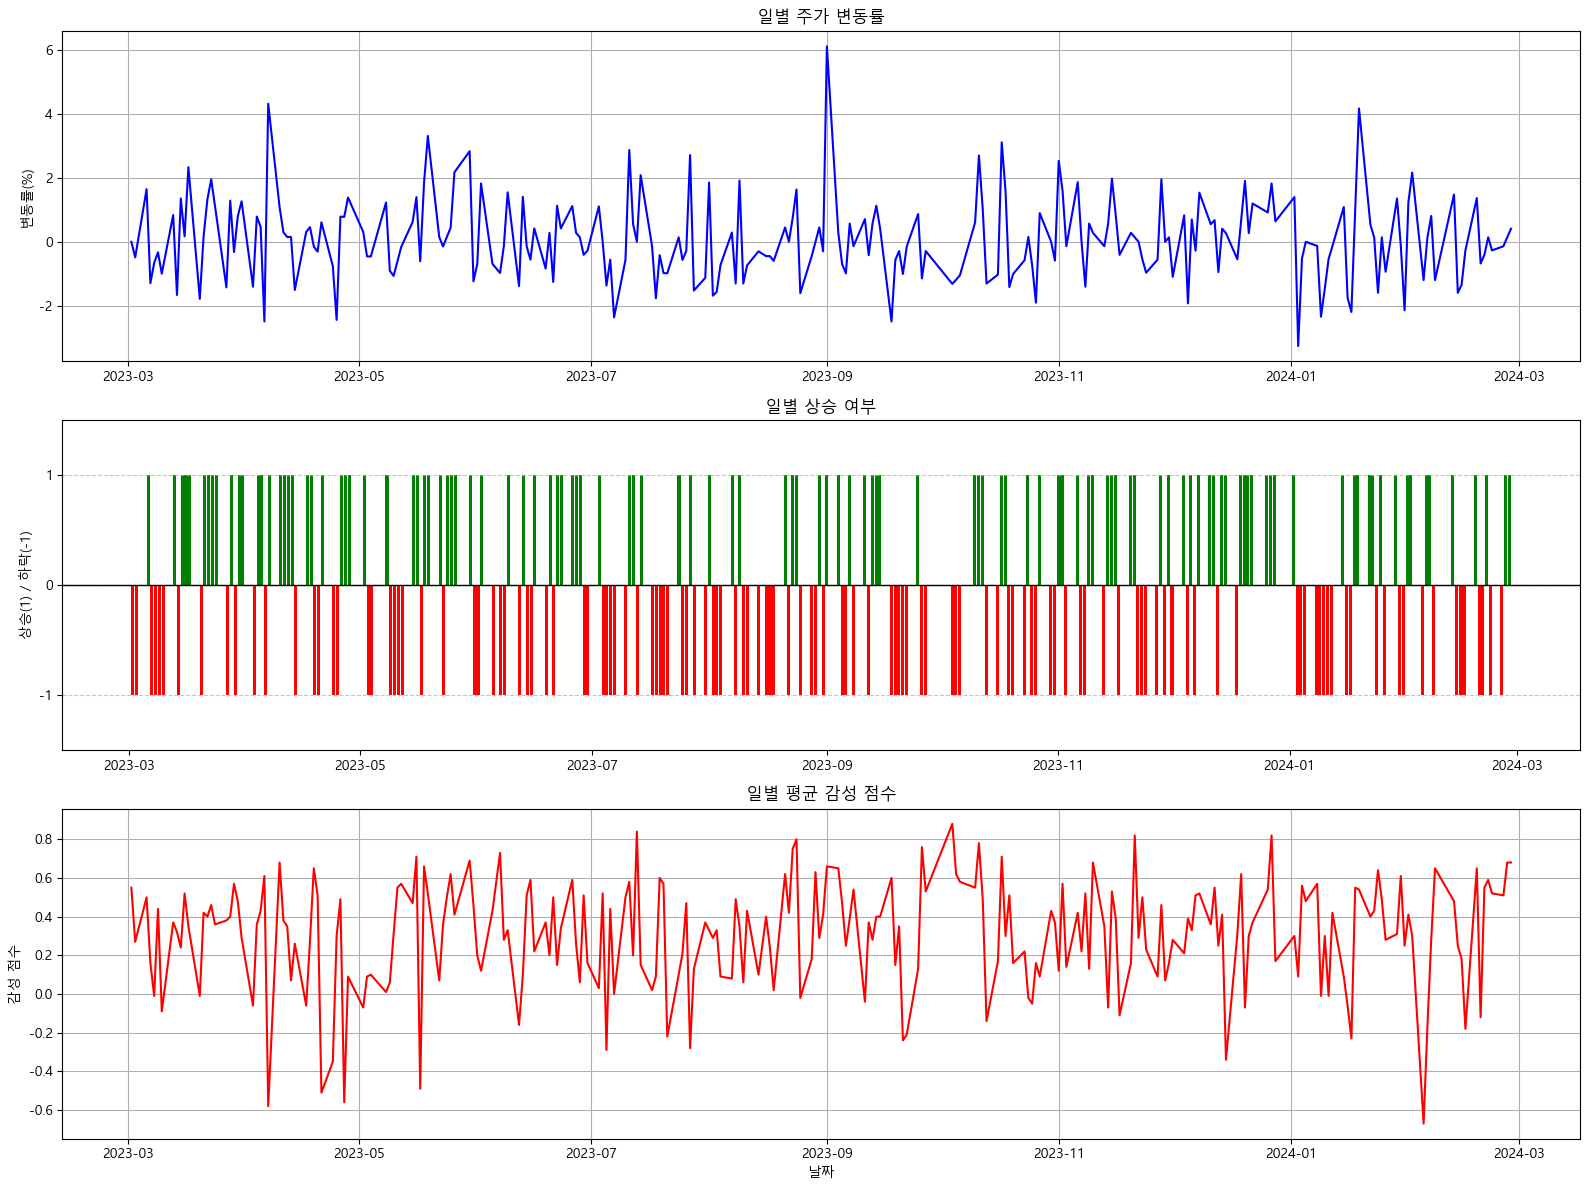

In [2]:
# CSV 불러오기
df = pd.read_csv("C:/Stocker_Project/Stocker/data/data_preprocessing.csv", parse_dates=['날짜'])

# 그래프 크기 지정
plt.figure(figsize=(16, 12))

# 1. 주가 변동률(%) 시각화
plt.subplot(3, 1, 1)
plt.plot(df['날짜'], df['변동률(%)'], color='blue')
plt.title('일별 주가 변동률')
plt.ylabel('변동률(%)')
plt.grid(True)

# 2. 상승 여부 시각화 -> 막대그래프 (0은 -1로 변환해서 시각적으로 구분)
plt.subplot(3, 1, 2)
df['상승 여부 시각화'] = df['상승 여부'].replace({0: -1, 1: 1})
colors = df['상승 여부'].map({0: 'red', 1: 'green'})
plt.bar(df['날짜'], df['상승 여부 시각화'], color=colors)
plt.axhline(0, color='black', linewidth=1)
plt.ylim(-1.5, 1.5)  # y축 범위 고정
plt.title('일별 상승 여부')
plt.ylabel('상승(1) / 하락(-1)')
plt.yticks([-1, 0, 1])  # ← 여기서 y축 눈금 고정
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# 3. 감성 점수 시각화
plt.subplot(3, 1, 3)
plt.plot(df['날짜'], df['감성점수'], color='red')
plt.title('일별 평균 감성 점수')
plt.xlabel('날짜')
plt.ylabel('감성 점수')
plt.grid(True)

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()

In [3]:
#상관관계 분석 - 피어슨 상관계수
corr1 = df['상승 여부'].corr(df['감성점수'])
print(f"상승 여부와 감성 점수 간의 상관계수: {corr1:.3f}")

corr2 = df[['감성점수', '변동률(%)']].corr().iloc[0, 1]
print(f"감성 점수와 주가 변동률의 상관계수: {corr2:.3f}")

상승 여부와 감성 점수 간의 상관계수: 0.094
감성 점수와 주가 변동률의 상관계수: 0.166


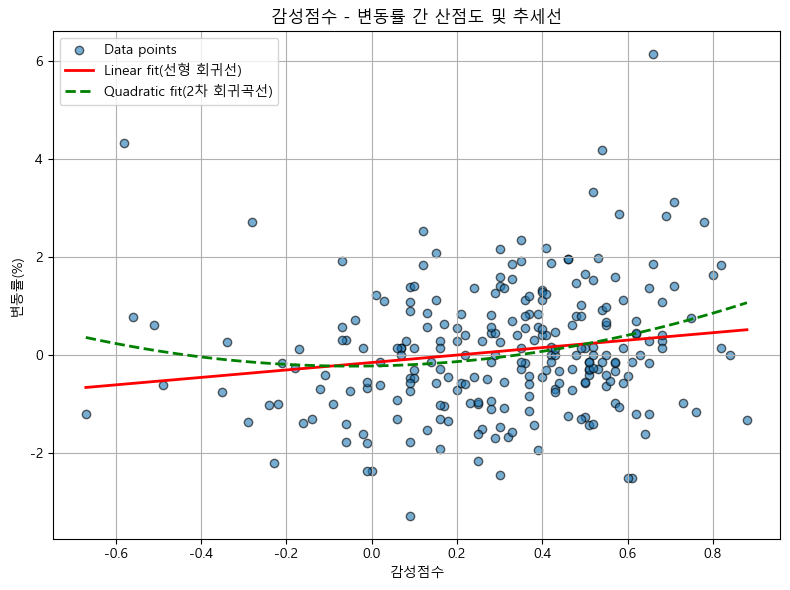

In [4]:
## 감성점수와 주가 변동률의 산점도 및 추세선

# 1. X, Y 추출
x = df['감성점수'].values
y = df['변동률(%)'].values

# 2. Figure 및 산점도
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.6, edgecolor='k', label='Data points')

# 3. 1차(선형) 회귀선 계산 및 플롯
coef1 = np.polyfit(x, y, 1)           # 1차 다항식(선형) 계수
line1 = np.poly1d(coef1)              # 선형 함수 객체
xs = np.linspace(x.min(), x.max(), 100)
plt.plot(xs, line1(xs), 'r-', linewidth=2, label=f'Linear fit(선형 회귀선)')

# 4. 2차(비선형) 회귀곡선 계산 및 플롯
coef2 = np.polyfit(x, y, 2)           # 2차 다항식 계수
poly2 = np.poly1d(coef2)              # 2차 함수 객체
plt.plot(xs, poly2(xs), 'g--', linewidth=2, label='Quadratic fit(2차 회귀곡선)')

# 5. 축 레이블, 제목, 범례, 그리드
plt.xlabel('감성점수')
plt.ylabel('변동률(%)')
plt.title('감성점수 - 변동률 간 산점도 및 추세선')
plt.legend()
plt.grid(True)

# 6. 출력
plt.tight_layout()
plt.show()